# <center> Reddit projekat ASM
##    <center> Miloš Popović, Dunja Maslarević

In [1]:
import pandas as pd
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Učitavanje potrebnih podataka

In [3]:
posts = pd.DataFrame()
curr = pd.DataFrame()
for i in range(12):
    filename = f'submissions_2008_asm/csv-{i}.csv'
    curr = pd.read_csv(filename)
    posts = pd.concat([curr, posts])

In [4]:
posts.head()

Unnamed: 0     id                                                url  \
0           0  7gjgw  http://waronyou.com/forums/index.php?topic=395...   
1           1  7gjgx  http://knockedupcelebs.com/2008/11/30/britney-...   
2           2  7gjgy  http://www.politico.com/news/stories/1108/1592...   
3           3  7gjgz              http://bon-jovi-run-away.blogspot.com   
4           4  7gjh0  http://totallytennessee.today.com/2008/11/30/d...   

                                           permalink          author  \
0  /r/reddit.com/comments/7gjgw/medvedev_has_welc...        waronyou   
1  /r/celebrities/comments/7gjgx/britney_spears_k...     whisperthis   
2  /r/politics/comments/7gjgy/waning_support_from...       [deleted]   
3  /r/worldnews/comments/7gjgz/find_fans_of_runaw...        bombenge   
4  /r/travel/comments/7gjh0/dollywoods_the_polar_...  richdinatlanta   

   created_utc    subreddit subreddit_id  num_comments  score  over_18  \
0   1228089605   reddit.com         t5_6             0      0    False   
1   1228089607  celebrities     t5_2qhul             0      2    False   
2   1228089618     politics     t5_2cneq             0      0    False   
3   1228089629    worldnews     t5_2qh13             0      1    False   
4   1228089649       travel     t5_2qh41             1      0    False   

  distinguished                          domain  stickied  locked  hide_score  
0           NaN                    waronyou.com     False   False       False  
1           NaN             knockedupcelebs.com     False   False       False  
2           NaN                    politico.com     False   False       False  
3           NaN  bon-jovi-run-away.blogspot.com     False   False       False  
4           NaN      totallytennessee.today.com     False   False       False

In [9]:
print(f'Učitano je {posts.shape[0]} podataka o objavama.')

Učitano je 2519853 podataka o objavama.


In [6]:
comments = pd.DataFrame()
curr = pd.DataFrame()
for i in range(12):
    filename = f'comments_2008_asm/csv-{i}.csv'
    curr = pd.read_csv(filename)
    comments = pd.concat([curr, comments])

In [7]:
comments.head()

Unnamed: 0 id      author   parent_id  created_utc   subreddit  \
0           0  2  malcontent  t1_c06vdmu   1229580037    politics   
1           1  3  malcontent  t1_c06vcxp   1229580041    politics   
2           2  4  malcontent  t1_c06vcxp   1229580053    politics   
3           3  5   [deleted]  t1_c06vuga   1229580067         WTF   
4           4  6   [deleted]    t3_7k97q   1229580072  reddit.com   

  subreddit_id  score distinguished  gilded  controversiality  
0     t5_2cneq      1           NaN       0                 0  
1     t5_2cneq      1           NaN       0                 0  
2     t5_2cneq      2           NaN       0                 0  
3     t5_2qh61      1           NaN       0                 0  
4         t5_6      1           NaN       0                 0

In [10]:
print(f'Učitano je {comments.shape[0]} podataka o komentarima.')

Učitano je 7242871 podataka o komentarima.


### Provera postojanja null vrednosti i jedinstvenosti kolona

In [14]:
posts.isnull().values.any()

True

In [22]:
for col in posts.columns:
    if posts[col].isnull().values.any():
        print(f' U koloni {col} ima nedostajućih vrednosti.')

 U koloni distinguished ima nedostajućih vrednosti.
 U koloni domain ima nedostajućih vrednosti.


In [24]:
for col in posts.columns:
    if posts[col].is_unique:
        print(f' Kolona {col} ima jedinstvene vrednosti.')

 Kolona id ima jedinstvene vrednosti.
 Kolona permalink ima jedinstvene vrednosti.


### Statistička obrada podataka

#### 1. 1 Broj različitih subredita

In [30]:
diff_subredits = len(posts['subreddit_id'].unique())
print(f'Broj razlicitih subredita je {diff_subredits}.')

Broj razlicitih subredita je 4968.


Prikaz broja pojavljivanja određenog subredita:

In [52]:
subreddits = posts[['subreddit_id', 'id']].groupby('subreddit_id').count().reset_index().rename(columns={'id':'count'})
subreddits.sort_values(by = 'subreddit_id',ascending=False)
subreddits.head(10)

subreddit_id  count
0     t5_1a8ah   8121
1     t5_1efbr   1732
2     t5_1rqwi   1900
3      t5_21n6     16
4      t5_21nj      2
5      t5_21of     22
6      t5_22i0   3373
7      t5_22i1   2313
8      t5_22i2   3296
9      t5_22i3    236

#### 1.2 Najvažniji subrediti po broju korisnika

In [63]:
subreddits_users = posts[['subreddit_id', 'author']].groupby(['subreddit_id']).agg({'author': 'nunique'})
subreddits_users = subreddits_users.reset_index().rename(columns={'author':'number_of_users'})
print(subreddits_users.sort_values(by='number_of_users', ascending=False).head(10))

     subreddit_id  number_of_users
4963         t5_6           138153
23       t5_2cneq            15250
26       t5_2qgzg            13009
48       t5_2qh16            13002
30       t5_2qh0f            12624
109      t5_2qh33            12013
37       t5_2qh0u             8804
24        t5_2fwo             8671
45       t5_2qh13             8383
4966      t5_mouw             7785


#### 1.3 Najvažniji subrediti po broju komentara

In [47]:
subreddits_comments = posts[['subreddit_id', 'num_comments']].groupby('subreddit_id').sum()
print(subreddits_comments.reset_index().sort_values(by='num_comments', ascending=False).head(10))

     subreddit_id  num_comments
4963         t5_6       1768764
23       t5_2cneq       1059618
24        t5_2fwo        421137
37       t5_2qh0u        383239
4966      t5_mouw        340915
45       t5_2qh13        311134
191      t5_2qh61        257815
109      t5_2qh33        237098
48       t5_2qh16        206335
59       t5_2qh1i        196314


#### 2. Prosečan broj aktivnih korisnika

In [66]:
submissions_comments = pd.concat([posts[['subreddit_id', 'author']], comments[['subreddit_id', 'author']]])
submissions_comments = submissions_comments.groupby('subreddit_id').agg({"author": "nunique"}).reset_index()

submissions_comments = submissions_comments.rename(columns={'author':'number_of_active_users'})
print(submissions_comments.sort_values(by='number_of_active_users', ascending=False).head(10))

     subreddit_id  number_of_active_users
5026         t5_6                  163780
24       t5_2cneq                   38375
38       t5_2qh0u                   29754
49       t5_2qh16                   28338
112      t5_2qh33                   28187
31       t5_2qh0f                   26361
5030      t5_mouw                   25855
25        t5_2fwo                   25820
27       t5_2qgzg                   25254
46       t5_2qh13                   24938


####  3. Korisnici sa najvećim brojem objava

In [68]:
auhors_with_submissions = posts[['id', 'author']].groupby('author').count().reset_index().rename(columns={'id':'number_of_posts'})
auhors_with_submissions.sort_values(by='number_of_posts', ascending=False).head(10)

author  number_of_posts
31897          [deleted]           475043
84824                gst            18870
141814             qgyh2            12238
147360            rmuser             9822
173692            twolf1             8597
13172   IAmperfectlyCalm             8308
141767         qazamisan             6927
54961          charlatan             5998
90684           igeldard             5373
130853          noname99             5334

####  3. Korisnici sa najvećim brojem komentara

In [70]:
auhors_with_comments = comments[['id', 'author']].groupby('author').count().reset_index().rename(columns={'id':'number_of_comments'})
auhors_with_comments.sort_values(by='number_of_comments', ascending=False).head(10)

author  number_of_comments
19467         [deleted]             2369181
12598   NoMoreNicksLeft               13480
56872        malcontent               12159
57873            matts2               11672
58884        mexicodoug                9169
650                7oby                9161
21028         aletoledo                8085
61555          mutatron                7771
65057         otakucode                7759
69966  redditcensoredme                7468

#### 4. Korisnici aktivni na najvećem broju sabredita

In [ ]:
Ovde mislim da je greska, treba da brojimo unique subredite

In [72]:
authors_on_subreddits = pd.concat([posts[['subreddit_id', 'author']], comments[['subreddit_id', 'author']]])
authors_on_subreddits = authors_on_subreddits.groupby('author').count().reset_index().rename(columns={'subreddit_id':'number_of_subreddits'})
authors_on_subreddits.sort_values(by='number_of_subreddits', ascending=False).head(10)

author  number_of_subreddits
41700         [deleted]               2844224
105415              gst                 19170
173849            qgyh2                 14856
27565   NoMoreNicksLeft                 13592
180614           rmuser                 13115
142194       malcontent                 12197
145345           matts2                 11709
1601               7oby                 10581
47231            alllie                 10194
148038       mexicodoug                  9172

In [ ]:
ispravka, proveriti

In [80]:
authors_on_subreddits = pd.concat([posts[['subreddit_id', 'author']], comments[['subreddit_id', 'author']]])
authors_on_subreddits = authors_on_subreddits.groupby('author').agg({"subreddit_id": "nunique"}).reset_index().rename(columns={'subreddit_id':'number_of_subreddits'})
authors_on_subreddits.sort_values(by='number_of_subreddits', ascending=False).head(10)

author  number_of_subreddits
41700        [deleted]                  2763
26168         MrKlaatu                   181
12888         Escafane                   154
163080       omfgninja                   122
187415  scientologist2                   111
73132         codepoet                   111
212137    turkourjurbs                   110
36316      Sylveran-01                   107
54918            b34nz                   107
133073      krugerlive                   106

#### 5. Korelacija broja objava i broja komentara

In [81]:
correlation_df = pd.merge(auhors_with_submissions, auhors_with_comments, how='inner', on='author')
print(correlation_df)

                     author  number_of_posts  number_of_comments
0      --------------------                1                   7
1                       -J-               13                1447
2                 -Lil-one-                1                   1
3                      -So-                2                  12
4                       -Y-                1                   1
...                     ...              ...                 ...
47275               zztyzzy                3                   3
47276                zzxxqq                2                   7
47277                zzygan                3                   1
47278        zzzSleepyCoder                2                   6
47279              zzzz2008               16                  58

[47280 rows x 3 columns]


In [82]:
correlation_df.corr(method='pearson')

number_of_posts  number_of_comments
number_of_posts            1.000000            0.996693
number_of_comments         0.996693            1.000000

In [83]:
correlation_df.loc[correlation_df['author'] == '[deleted]']

author  number_of_posts  number_of_comments
9664  [deleted]           475043             2369181

In [ ]:
Ovu prvu sliku bih izbacila

<AxesSubplot:xlabel='number_of_posts'>

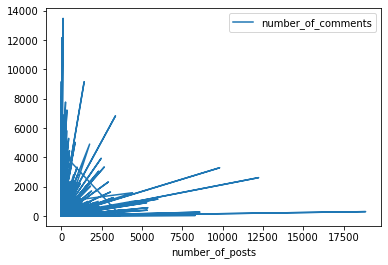

In [90]:
correlation_df = correlation_df.loc[correlation_df['author'] != '[deleted]']
correlation_df.corr(method='pearson')
correlation_df.plot(x='number_of_posts', y='number_of_comments')

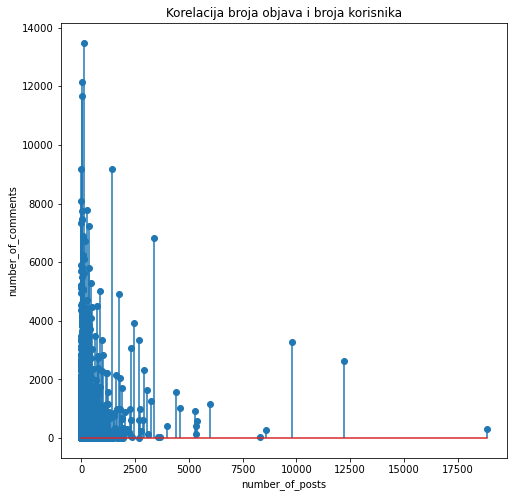

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
x = np.array(correlation_df['number_of_posts'])
y = np.array(correlation_df['number_of_comments'])
plt.stem(x,y)
plt.xlabel('number_of_posts')
plt.ylabel('number_of_comments')
plt.title('Korelacija broja objava i broja korisnika')
plt.show()

#### 6. Informacije o objavama sa najvećim brojem komentara

In [95]:
posts_with_max_comments = posts[['id','url', 'author', 'subreddit', 'num_comments', 'over_18', 'domain']]
posts_with_max_comments = posts_with_max_comments.loc[posts_with_max_comments['over_18'] == False]
posts_with_max_comments = posts_with_max_comments.sort_values(by='num_comments', ascending=False)

In [96]:
top10_posts_with_max_comments = posts_with_max_comments.iloc[0:10]
top10_posts_with_max_comments

id                                                url  \
111467  6nz1k                          http://hundredpushups.com   
191265  78n1v  http://www.time.com/time/nation/article/0,8599...   
191390  7kpe5  https://www.reddit.com/r/AskReddit/comments/7k...   
135995  675oj  https://www.reddit.com/r/reddit.com/comments/6...   
36220   7beo2  https://www.reddit.com/r/politics/comments/7be...   
73206   6jbc0  https://www.reddit.com/r/reddit.com/comments/6...   
84267   6w7e6  https://www.reddit.com/r/reddit.com/comments/6...   
197408  6yn6t                   http://www.cnbc.com/id/26454655?   
41921   7bj3f  http://www.latimes.com/news/local/la-me-gaymar...   
119357  7d7jm  https://www.reddit.com/r/reddit.com/comments/7...   

              author   subreddit  num_comments  over_18              domain  
111467         zekel     science         33329    False  hundredpushups.com  
191265      indorock         WTF          3657    False            time.com  
191390     [deleted]   AskReddit          3467    False      self.AskReddit  
135995   matiasklein  reddit.com          2039    False     self.reddit.com  
36220   willjohnston    politics          1934    False       self.politics  
73206      [deleted]  reddit.com          1808    False     self.reddit.com  
84267      [deleted]  reddit.com          1724    False     self.reddit.com  
197408     [deleted]    politics          1668    False            cnbc.com  
41921      [deleted]  reddit.com          1605    False         latimes.com  
119357     [deleted]  reddit.com          1505    False     self.reddit.com

In [97]:
top10_urls = top10_posts_with_max_comments['url']

# Modelovanje mreza

In [111]:
import networkx as nx

In [115]:
set_subreddits_id = set(posts['subreddit_id'])
G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(set_subreddits_id) # dodaje čvorove čije su labele u "skup_id"
